**IMport Library**

In [170]:
import numpy as np #digunakan untuk oprasi matematika
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as py
import math
#digunakan untuk oprasi oprasi sincostang
from pandas import read_csv 
#digunakan untuk membaca dataset dengan format csv
import sys

**Import Data Set**

In [171]:
dataset = read_csv('5.csv', header=0, index_col=0) #dengan indek ke 0 pada dataset

**Entering dataset To list**

In [172]:
x = [] #dimana data x untuk filtering di taruh 
t = [] #dimana dataset (A) di taruh
for i in range(len(dataset.values)):
  x.append(dataset.values[i][2]) #dimana data difilter yang saya gunakan data C pada Csv
  
for i in range(len(dataset.values)):
  t.append(i)

x=np.array(x)
t=np.array(t)

**Data prepare situation**

In [173]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Persyaratan FIlter
order = 5
fs = 30      # sample rate per data
cutoff = 8  # memotong fekueensi yang saya inginkan

**Noisy" data.saya ingin memulihkan sinyal 1,2 Hz dari ini**

In [174]:
datax = np.sin(1.2*2*np.pi*x) + 1.5*np.cos(9*2*np.pi*x) \
        + 0.5*np.sin(12.0*2*np.pi*x)

**Dapatkan koefisien filter sehingga kita dapat memeriksa respons frekuensinya**

In [175]:
# ambil dari hasil koefisiensi filter.
b, a = butter_lowpass(cutoff, fs, order)
#menaruh fungsi LPF kedalam variabel untuk diplotkan nantinya
filterx = butter_lowpass_filter(datax, cutoff, fs, order)

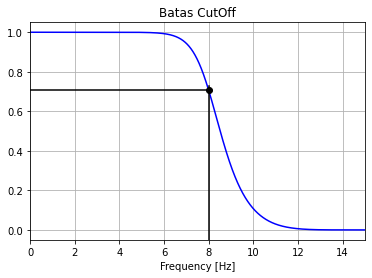

In [176]:
b, a = butter_lowpass(cutoff, fs)
w, h = freqz(b, a, worN=8000)
py.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
py.plot(cutoff, 0.5*np.sqrt(2), 'ko')
py.axvline(cutoff,ymax=0.5*np.sqrt(2), color='k')
py.axhline(0.5*np.sqrt(2),xmax = cutoff/(fs/2), color='k')
py.xlim(0, 0.5*fs)
py.title("Batas CutOff")
py.xlabel('Frequency [Hz]')
py.grid()

**plot sinyal asli dan terfilter.**


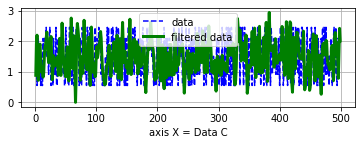

In [177]:
py.subplot(2, 1, 2)
py.plot(t[1:500], datax[1:500], 'b-', linestyle="--",label='data')
py.plot(t[1:500], filterx[1:500], 'g-',linestyle="-",linewidth=3, label='filtered data')
py.xlabel('axis X = Data C')
py.grid()
py.legend()
#karena data yang terlu banyak untuk itu saya menggunakan tampilan 1-200 

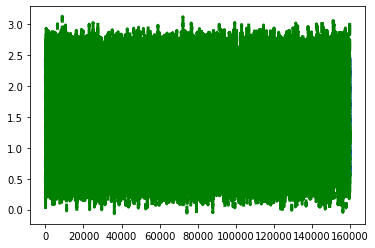

In [178]:
py.plot(t,datax, 'b-', linestyle="--",linewidth=3, label='data')
py.plot(t,filterx, 'g-', linestyle="--",linewidth=3, alpha = 1, label='filtered data')